In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import sys
sys.path.append('../')
from utils import *

pd.set_option('display.max_columns', None)

In [2]:
DATA_PATH = '../../data/networks/match_952209/'
XT_PLOT_PATH = '../../data/smoothed_xt.csv'
"""
WYSCOUT_PATH = DATA_PATH + 'wyscout/'
SKILLCORNER_PATH = DATA_PATH + 'skillcorner/'
SKILLCORNER_RAW_PATH = DATA_PATH + 'skillcorner_raw/'
XT_PLOT_PATH = DATA_PATH + 'smoothed_xt.csv'
MATCH_IDS_PATH = DATA_PATH + 'matchids.csv'
WYSCOUT_TO_SKILLCORNER = DATA_PATH + 'wyscout2skillcorner.csv'
"""

"\nWYSCOUT_PATH = DATA_PATH + 'wyscout/'\nSKILLCORNER_PATH = DATA_PATH + 'skillcorner/'\nSKILLCORNER_RAW_PATH = DATA_PATH + 'skillcorner_raw/'\nXT_PLOT_PATH = DATA_PATH + 'smoothed_xt.csv'\nMATCH_IDS_PATH = DATA_PATH + 'matchids.csv'\nWYSCOUT_TO_SKILLCORNER = DATA_PATH + 'wyscout2skillcorner.csv'\n"

In [3]:
passes_network = pd.read_csv(DATA_PATH + 'passes_network.csv')

In [4]:
passes_network.sort_values(by = 'dxt', ascending= False)

,Unnamed: 0,player.id.skillcorner,pass.recipient.id.skillcorner,location.x,location.y,pass.endLocation.x,pass.endLocation.y,dxt,match.period,team.name,responsibility.sum,responsibility.count
377,377,33512,3837,-45.625000,-16.493333,-47.000000,1.409231,0.126503,1,Netherland,2.546625,4
267,267,12190,5922,47.916667,12.826667,47.916667,0.000000,0.126292,1,France,0.389950,2
276,276,12218,11516,26.470588,20.160000,48.833333,-12.215556,0.076054,1,France,6.658317,9
366,366,31930,7387,-41.500000,-10.993333,-45.625000,-2.113846,0.075595,1,Netherland,0.536297,1
243,243,11606,16320,34.941176,24.530526,41.500000,5.636923,0.072271,1,France,3.326875,8
...,...,...,...,...,...,...,...,...,...,...,...,...
380,380,33512,7863,-19.058824,-30.357895,12.705882,-25.258947,-0.015362,1,Netherland,1.215239,3
73,73,6028,11606,23.294118,29.629474,3.176471,29.629474,-0.015842,1,France,0.919318,1
247,247,11630,277,42.875000,-29.629474,28.588235,-27.444211,-0.021768,1,France,1.064691,2
66,66,6028,277,-32.823529,-17.715556,-21.176471,-16.493333,-0.023043,2,France,0.776111,1


In [5]:
xt_table = pd.read_csv(XT_PLOT_PATH)
xt_table

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104
0,0.000635,0.000676,0.000738,0.000803,0.000857,0.000899,0.000930,0.000952,0.000966,0.000976,0.000983,0.000991,0.001001,0.001018,0.001041,0.001074,0.001114,0.001160,0.001211,0.001262,0.001311,0.001357,0.001399,0.001439,0.001479,0.001522,0.001572,0.001633,0.001708,0.001798,0.001904,0.002026,0.002162,0.002311,0.002471,0.002640,0.002817,0.002996,0.003177,0.003354,0.003524,0.003684,0.003834,0.003975,0.004112,0.004254,0.004409,0.004588,0.004800,0.005050,0.005341,0.005671,0.006034,0.006423,0.006830,0.007249,0.007676,0.008112,0.008561,0.009032,0.009535,0.010081,0.010679,0.011336,0.012052,0.012825,0.013648,0.014511,0.015407,0.016328,0.017269,0.018230,0.019216,0.020235,0.021295,0.022406,0.023574,0.024804,0.026095,0.027440,0.028831,0.030256,0.031705,0.033166,0.034628,0.036078,0.037508,0.038906,0.040262,0.041569,0.042825,0.044042,0.045245,0.046475,0.047782,0.049218,0.050839,0.052700,0.054856,0.057363,0.060270,0.063590,0.067176,0.070499,0.120000
1,0.000626,0.000662,0.000717,0.000775,0.000825,0.000865,0.000897,0.000921,0.000939,0.000954,0.000967,0.000981,0.000997,0.001018,0.001045,0.001079,0.001119,0.001165,0.001214,0.001263,0.001311,0.001357,0.001400,0.001441,0.001483,0.001528,0.001580,0.001642,0.001716,0.001805,0.001909,0.002029,0.002164,0.002313,0.002475,0.002650,0.002834,0.003024,0.003216,0.003406,0.003588,0.003759,0.003916,0.004063,0.004203,0.004347,0.004505,0.004686,0.004902,0.005159,0.005459,0.005800,0.006175,0.006576,0.006994,0.007420,0.007851,0.008286,0.008731,0.009197,0.009694,0.010235,0.010829,0.011484,0.012203,0.012980,0.013810,0.014682,0.015588,0.016518,0.017468,0.018438,0.019433,0.020459,0.021528,0.022647,0.023825,0.025066,0.026369,0.027728,0.029132,0.030572,0.032035,0.033509,0.034986,0.036457,0.037916,0.039360,0.040783,0.042184,0.043563,0.044930,0.046301,0.047703,0.049166,0.050723,0.052408,0.054256,0.056301,0.058577,0.061113,0.063911,0.066852,0.069527,0.071196
2,0.000615,0.000643,0.000687,0.000734,0.000777,0.000815,0.000847,0.000875,0.000900,0.000922,0.000944,0.000966,0.000991,0.001018,0.001050,0.001087,0.001128,0.001172,0.001219,0.001267,0.001314,0.001359,0.001404,0.001448,0.001493,0.001542,0.001597,0.001661,0.001735,0.001822,0.001924,0.002040,0.002172,0.002321,0.002487,0.002668,0.002864,0.003069,0.003278,0.003486,0.003686,0.003872,0.004043,0.004198,0.004345,0.004494,0.004655,0.004842,0.005065,0.005333,0.005648,0.006006,0.006399,0.006817,0.007250,0.007687,0.008124,0.008559,0.009001,0.009460,0.009948,0.010481,0.011070,0.011725,0.012446,0.013231,0.014071,0.014957,0.015877,0.016823,0.017789,0.018775,0.019785,0.020829,0.021915,0.023054,0.024255,0.025521,0.026852,0.028240,0.029675,0.031144,0.032636,0.034138,0.035643,0.037149,0.038656,0.040168,0.041692,0.043233,0.044796,0.046387,0.048010,0.049669,0.051369,0.053113,0.054903,0.056745,0.058640,0.060592,0.062601,0.064652,0.066667,0.068408,0.069463
3,0.000606,0.000627,0.000660,0.000697,0.000734,0.000769,0.000802,0.000833,0.000863,0.000893,0.000923,0.000954,0.000986,0.001020,0.001057,0.001096,0.001137,0.001181,0.001226,0.001273,0.001319,0.001366,0.001413,0.001461,0.001512,0.001566,0.001625,0.001692,0.001767,0.001853,0.001951,0.002064,0.002194,0.002341,0.002508,0.002695,0.002900,0.003118,0.003343,0.003568,0.003784,0.003986,0.004170,0.004337,0.004493,0.004648,0.004817,0.005012,0.005245,0.005525,0.005855,0.006229,0.006639,0.007074,0.007521,0.007969,0.008412,0.008849,0.009289,0.009743,0.010226,0.010754,0.011340,0.011994,0.012719,0.013511,0.014362,0.015261,0.016197,0.017161,0.018146,0.019153,0.020186,0.021255,0.022370,0.023543,0.024781,0.026089,0.027465,0.028901,0.030384,0.031901,0.033436,0.034980,0.036524,0.038071,0.039629,0.041212,0.042834,0.044509,0.046247,0.048052,0.049917,0.051826,

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
single_row = passes_network[passes_network[passes_network.columns[0]] == 276].iloc[0]

In [8]:
df = pd.DataFrame([single_row] * 105 * 4 * 68 * 4)
df

,Unnamed: 0,player.id.skillcorner,pass.recipient.id.skillcorner,location.x,location.y,pass.endLocation.x,pass.endLocation.y,dxt,match.period,team.name,responsibility.sum,responsibility.count
276,276,12218,11516,26.470588,20.16,48.833333,-12.215556,0.076054,1,France,6.658317,9
276,276,12218,11516,26.470588,20.16,48.833333,-12.215556,0.076054,1,France,6.658317,9
276,276,12218,11516,26.470588,20.16,48.833333,-12.215556,0.076054,1,France,6.658317,9
276,276,12218,11516,26.470588,20.16,48.833333,-12.215556,0.076054,1,France,6.658317,9
276,276,12218,11516,26.470588,20.16,48.833333,-12.215556,0.076054,1,France,6.658317,9
...,...,...,...,...,...,...,...,...,...,...,...,...
276,276,12218,11516,26.470588,20.16,48.833333,-12.215556,0.076054,1,France,6.658317,9
276,276,12218,11516,26.470588,20.16,48.833333,-12.215556,0.076054,1,France,6.658317,9
276,276,12218,11516,26.470588,20.16,48.833333,-12.215556,0.076054,1,France,6.658317,9
276,276,12218,11516,26.470588,20.16,48.833333,-12.215556,0.076054,1,France,6.658317,9


In [9]:
# Define the range for x and y values around the locations
"""
range_ = 10
range_start_x = single_row['location.x'] - range_
range_end_x = single_row['pass.endLocation.x'] + range_
range_start_y = single_row['location.y'] + range_
range_end_y = single_row['pass.endLocation.y'] - range_

# Define the number of points along each axis
num_points_x = 50  # Adjust for desired resolution in x direction
num_points_y = 50  # Adjust for desired resolution in y direction

# Create linearly spaced values across x and y range
x_values = np.linspace(range_start_x, range_end_x, num_points_x)
y_values = np.linspace(range_start_y, range_end_y, num_points_y)
"""
num_points_x = 105*4  # Adjust for desired resolution in x direction
num_points_y = 68*4  # Adjust for desired resolution in y direction

# Create linearly spaced values across x and y range
x_values = np.linspace(-52.5, 52.5, num_points_x)
y_values = np.linspace(-34, 34, num_points_y)

# Create a grid of all combinations of x and y values
grid_x, grid_y = np.meshgrid(x_values, y_values)

# Flatten the grid to create a single list of x and y values for each point in the grid

df['tracking.x'] = grid_x.flatten()
df['tracking.y'] = grid_y.flatten()


In [10]:
df.to_csv('grid_around_pass.csv')

In [11]:
import utils

In [12]:
def responsibility(row, ball_speed=12.0, defender_speed=6.0):
    start_x = row['location.x']
    start_y = row['location.y']
    end_x = row['pass.endLocation.x']
    end_y = row['pass.endLocation.y']
    player_x = row['tracking.x']
    player_y = row['tracking.y']
    
    # Vector from start to end of the pass
    pass_vector = np.array([end_x - start_x, end_y - start_y])
    pass_length = np.linalg.norm(pass_vector)
    
    if pass_length == 0:
        return 0  # No pass, no responsibility
    
    # Unit vector along the pass trajectory
    pass_unit_vector = pass_vector / pass_length

    # Time for the ball to travel the length of the pass
    ball_time = pass_length / ball_speed

    # Maximum distance the defender can travel in the same time
    max_defender_distance = defender_speed * ball_time

    # Width of the triangle at the far end (cone edge)
    max_width = 2 * max_defender_distance

    # Find the projection of the player onto the pass vector
    player_vector = np.array([player_x - start_x, player_y - start_y])
    projection_length = np.dot(player_vector, pass_unit_vector)
    
    # Clamp the projection length to the range [0, pass_length]
    projection_length = max(0, min(projection_length, pass_length))

    # Find the closest point on the pass trajectory
    closest_point = np.array([start_x, start_y]) + projection_length * pass_unit_vector

    # Perpendicular distance from the defender to the pass trajectory
    perpendicular_distance = np.linalg.norm(np.array([player_x, player_y]) - closest_point)

    # Calculate the triangle width at the defender's projection point
    triangle_width_at_point = max_width * (projection_length / pass_length)

    # Determine if the player is inside the interceptability region
    if perpendicular_distance <= triangle_width_at_point / 2:
        # Calculate responsibility based on perpendicular distance
        responsibility_score = 1 - (perpendicular_distance / (triangle_width_at_point / 2))
    else:
        # Player is outside the triangle
        responsibility_score = 0

    return responsibility_score

In [13]:
df['tracking.object_id'] = 1
df['responsibility'] = df.apply(responsibility, axis=1)
df

,Unnamed: 0,player.id.skillcorner,pass.recipient.id.skillcorner,location.x,location.y,pass.endLocation.x,pass.endLocation.y,dxt,match.period,team.name,responsibility.sum,responsibility.count,tracking.x,tracking.y,tracking.object_id,responsibility
276,276,12218,11516,26.470588,20.16,48.833333,-12.215556,0.076054,1,France,6.658317,9,-52.500000,-34.0,1,0.0
276,276,12218,11516,26.470588,20.16,48.833333,-12.215556,0.076054,1,France,6.658317,9,-52.249403,-34.0,1,0.0
276,276,12218,11516,26.470588,20.16,48.833333,-12.215556,0.076054,1,France,6.658317,9,-51.998807,-34.0,1,0.0
276,276,12218,11516,26.470588,20.16,48.833333,-12.215556,0.076054,1,France,6.658317,9,-51.748210,-34.0,1,0.0
276,276,12218,11516,26.470588,20.16,48.833333,-12.215556,0.076054,1,France,6.658317,9,-51.497613,-34.0,1,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,276,12218,11516,26.470588,20.16,48.833333,-12.215556,0.076054,1,France,6.658317,9,51.497613,34.0,1,0.0
276,276,12218,11516,26.470588,20.16,48.833333,-12.215556,0.076054,1,France,6.658317,9,51.748210,34.0,1,0.0
276,276,12218,11516,26.470588,20.16,48.833333,-12.215556,0.076054,1,France,6.658317,9,51.998807,34.0,1,0.0
276,276,12218,11516,26.470588,20.16,48.833333,-12.215556,0.076054,1,France,6.658317,9,52.249403,34.0,1,0.0


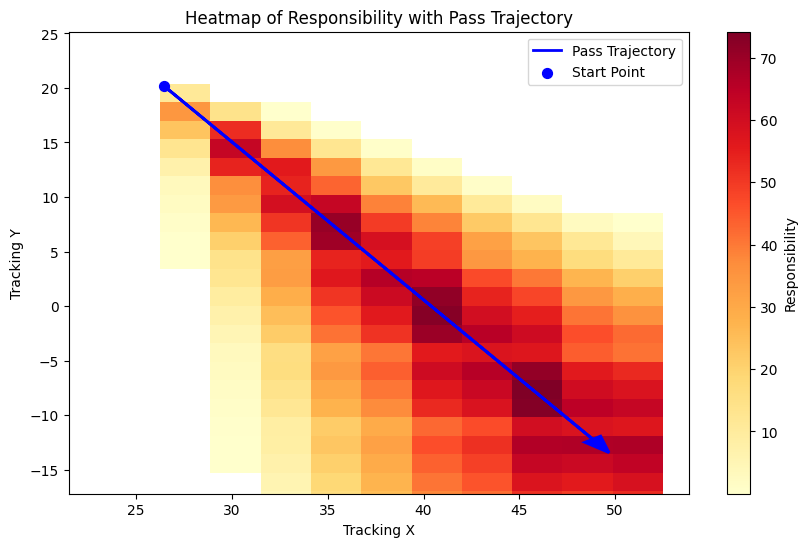

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create a 2D histogram heatmap for the responsibility based on tracking.x and tracking.y
# Heatmap using a 2D histogram of tracking.x, tracking.y with responsibility as weights
plt.figure(figsize=(10, 6))

plt.hist2d(df['tracking.x'], df['tracking.y'], weights=df['responsibility'], density= False,
           cmap='YlOrRd', bins=40, cmin=0.001)
plt.colorbar(label='Responsibility')

# Starting and ending points of the pass
start_x, start_y = df['location.x'].iloc[0], df['location.y'].iloc[0]
end_x, end_y = df['pass.endLocation.x'].iloc[0], df['pass.endLocation.y'].iloc[0]

# Overlay the pass trajectory with an arrow
plt.plot([start_x, end_x], [start_y, end_y], color='blue', linestyle='-', linewidth=2, label='Pass Trajectory')
plt.scatter([start_x], [start_y], color='blue', s=50, label='Start Point')  # Mark the start point

# Add an arrow to indicate direction
plt.arrow(start_x, start_y, end_x - start_x, end_y - start_y, 
          head_width=1, head_length=1.5, fc='blue', ec='blue', linewidth=2)
"""
# Overlay the pass trajectory
plt.plot([df['location.x'].iloc[0], df['pass.endLocation.x'].iloc[0]],
         [df['location.y'].iloc[0], df['pass.endLocation.y'].iloc[0]],
         color='blue', marker='o', linestyle='-', linewidth=2, markersize=5, label='Pass Trajectory')
"""
plt.xlim(min(single_row['location.x'], single_row['pass.endLocation.x']) - 5,
         max(single_row['location.x'], single_row['pass.endLocation.x']) + 5)
plt.ylim(min(single_row['location.y'], single_row['pass.endLocation.y']) - 5,
         max(single_row['location.y'], single_row['pass.endLocation.y']) + 5)

# Customize the plot
plt.title("Heatmap of Responsibility with Pass Trajectory")
plt.xlabel("Tracking X")
plt.ylabel("Tracking Y")
plt.legend()

plt.show()

## Best Attacker Option Calculation

In [57]:
passes = pd.read_csv('pass_table.csv')
passes.sample(20)

,frame,matchPeriod,team.name,player.id.wyscout,player.id.skillcorner,pass.recipient.id.wyscout,pass.recipient.id.skillcorner,location.x,location.y,pass.endLocation.x,pass.endLocation.y,play_direction,dxt,tracking.object_id,tracking.x,tracking.y,tracking.z,extrapolated,location.x_original,location.y_original,endLocation.x_original,endLocation.y_original,tracking.is_self,tracking.is_teammate,responsibility
9451,19877,1,France,352988,11516,344132,11606,-14.823529,7.046154,5.294118,29.629474,BOTTOM_TO_TOP,0.005184,7387,-2.48,-22.84,0.0,False,36,40,55,6,False,False,0.0
7539,15913,1,Netherland,491458,24466,134102,7863,4.235294,-17.104444,-16.941176,-28.901053,TOP_TO_BOTTOM,0.010663,7017,2.00,11.04,0.0,True,46,24,66,7,False,True,0.0
9757,21198,1,France,344132,11606,393247,16320,34.941176,24.530526,41.500000,5.636923,BOTTOM_TO_TOP,0.072271,11606,36.78,22.47,0.0,False,83,13,90,42,True,True,0.0
4605,10333,1,Netherland,625,7017,491458,24466,4.235294,10.382222,6.352941,31.814737,TOP_TO_BOTTOM,-0.002682,11606,-16.10,16.76,0.0,False,46,65,44,97,False,False,0.0
6005,13489,1,Netherland,134102,7863,535816,33512,-13.764706,-29.629474,-14.823529,-18.326667,TOP_TO_BOTTOM,0.004086,16320,-20.95,-27.43,0.0,False,63,6,64,22,False,False,0.0
486,749,1,Netherland,476361,14407,370,10738,20.117647,17.104444,14.823529,-10.993333,TOP_TO_BOTTOM,0.001134,11516,-10.34,6.38,0.0,False,31,76,36,34,False,False,0.0
17771,47597,2,Netherland,370,10738,33,4777,-25.411765,19.548889,-39.666667,-4.932308,BOTTOM_TO_TOP,-0.000851,11630,-0.27,23.20,0.0,False,26,20,12,57,False,False,0.0
7423,15687,1,Netherland,625,7017,535816,33512,8.470588,27.444211,13.764706,10.382222,TOP_TO_BOTTOM,-0.000506,33512,14.86,6.52,0.0,False,42,91,37,65,False,True,0.0
10137,22477,1,Netherland,626551,31930,704,10082,-14.823529,23.073684,-8.470588,31.086316,TOP_TO_BOTTOM,-0.008181,3837,-6.46,-5.57,0.0,False,64,85,58,96,False,True,0.0
12755,30808,2,Netherland,625,7017,476361,14407,-26.470588,17.104444,-11.647059,-18.326667,BOTTOM_TO_TOP,0.002128,16320,-0.93,23.74,0.0,True,25,24,39,78,False,False,0.0


In [16]:
DATA_PATH = '../../data/'
XT_PLOT_PATH = DATA_PATH + 'smoothed_xt.csv'
xt_table = pd.read_csv(XT_PLOT_PATH)
xt_table

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104
0,0.000635,0.000676,0.000738,0.000803,0.000857,0.000899,0.000930,0.000952,0.000966,0.000976,0.000983,0.000991,0.001001,0.001018,0.001041,0.001074,0.001114,0.001160,0.001211,0.001262,0.001311,0.001357,0.001399,0.001439,0.001479,0.001522,0.001572,0.001633,0.001708,0.001798,0.001904,0.002026,0.002162,0.002311,0.002471,0.002640,0.002817,0.002996,0.003177,0.003354,0.003524,0.003684,0.003834,0.003975,0.004112,0.004254,0.004409,0.004588,0.004800,0.005050,0.005341,0.005671,0.006034,0.006423,0.006830,0.007249,0.007676,0.008112,0.008561,0.009032,0.009535,0.010081,0.010679,0.011336,0.012052,0.012825,0.013648,0.014511,0.015407,0.016328,0.017269,0.018230,0.019216,0.020235,0.021295,0.022406,0.023574,0.024804,0.026095,0.027440,0.028831,0.030256,0.031705,0.033166,0.034628,0.036078,0.037508,0.038906,0.040262,0.041569,0.042825,0.044042,0.045245,0.046475,0.047782,0.049218,0.050839,0.052700,0.054856,0.057363,0.060270,0.063590,0.067176,0.070499,0.120000
1,0.000626,0.000662,0.000717,0.000775,0.000825,0.000865,0.000897,0.000921,0.000939,0.000954,0.000967,0.000981,0.000997,0.001018,0.001045,0.001079,0.001119,0.001165,0.001214,0.001263,0.001311,0.001357,0.001400,0.001441,0.001483,0.001528,0.001580,0.001642,0.001716,0.001805,0.001909,0.002029,0.002164,0.002313,0.002475,0.002650,0.002834,0.003024,0.003216,0.003406,0.003588,0.003759,0.003916,0.004063,0.004203,0.004347,0.004505,0.004686,0.004902,0.005159,0.005459,0.005800,0.006175,0.006576,0.006994,0.007420,0.007851,0.008286,0.008731,0.009197,0.009694,0.010235,0.010829,0.011484,0.012203,0.012980,0.013810,0.014682,0.015588,0.016518,0.017468,0.018438,0.019433,0.020459,0.021528,0.022647,0.023825,0.025066,0.026369,0.027728,0.029132,0.030572,0.032035,0.033509,0.034986,0.036457,0.037916,0.039360,0.040783,0.042184,0.043563,0.044930,0.046301,0.047703,0.049166,0.050723,0.052408,0.054256,0.056301,0.058577,0.061113,0.063911,0.066852,0.069527,0.071196
2,0.000615,0.000643,0.000687,0.000734,0.000777,0.000815,0.000847,0.000875,0.000900,0.000922,0.000944,0.000966,0.000991,0.001018,0.001050,0.001087,0.001128,0.001172,0.001219,0.001267,0.001314,0.001359,0.001404,0.001448,0.001493,0.001542,0.001597,0.001661,0.001735,0.001822,0.001924,0.002040,0.002172,0.002321,0.002487,0.002668,0.002864,0.003069,0.003278,0.003486,0.003686,0.003872,0.004043,0.004198,0.004345,0.004494,0.004655,0.004842,0.005065,0.005333,0.005648,0.006006,0.006399,0.006817,0.007250,0.007687,0.008124,0.008559,0.009001,0.009460,0.009948,0.010481,0.011070,0.011725,0.012446,0.013231,0.014071,0.014957,0.015877,0.016823,0.017789,0.018775,0.019785,0.020829,0.021915,0.023054,0.024255,0.025521,0.026852,0.028240,0.029675,0.031144,0.032636,0.034138,0.035643,0.037149,0.038656,0.040168,0.041692,0.043233,0.044796,0.046387,0.048010,0.049669,0.051369,0.053113,0.054903,0.056745,0.058640,0.060592,0.062601,0.064652,0.066667,0.068408,0.069463
3,0.000606,0.000627,0.000660,0.000697,0.000734,0.000769,0.000802,0.000833,0.000863,0.000893,0.000923,0.000954,0.000986,0.001020,0.001057,0.001096,0.001137,0.001181,0.001226,0.001273,0.001319,0.001366,0.001413,0.001461,0.001512,0.001566,0.001625,0.001692,0.001767,0.001853,0.001951,0.002064,0.002194,0.002341,0.002508,0.002695,0.002900,0.003118,0.003343,0.003568,0.003784,0.003986,0.004170,0.004337,0.004493,0.004648,0.004817,0.005012,0.005245,0.005525,0.005855,0.006229,0.006639,0.007074,0.007521,0.007969,0.008412,0.008849,0.009289,0.009743,0.010226,0.010754,0.011340,0.011994,0.012719,0.013511,0.014362,0.015261,0.016197,0.017161,0.018146,0.019153,0.020186,0.021255,0.022370,0.023543,0.024781,0.026089,0.027465,0.028901,0.030384,0.031901,0.033436,0.034980,0.036524,0.038071,0.039629,0.041212,0.042834,0.044509,0.046247,0.048052,0.049917,0.051826,

In [50]:
given_frame = 39

def filter_data(data, frame):
    data = data[data['frame'] == frame]
    return data

passes = filter_data(passes, given_frame)

In [51]:
calculate_best_attacker_option(passes, xt_table)

{4777: -0.003005522660876998,
 14407: -0.0011415124618715793,
 10738: -0.0058758198844594,
 24466: -0.0049683571374626,
 7863: -0.0055673972468884,
 33512: -0.0041575931087188,
 7017: -0.0031574854854305376,
 3837: -0.0013057860349326,
 10082: -0.00016009808422276582,
 31930: -0.00016617649557379189}

In [63]:
def attacker_options(data, frame, xt_table):
    data = filter_data(data, frame)

    pitch_length = 105
    pitch_width = 68
    xt_rows, xt_cols = 68, 105
    cell_width = pitch_length / xt_cols
    cell_height = pitch_width / xt_rows
    # adjust coordinates for correct dxt calculation
    def adjust_coordinates(x, y, direction):
        if direction == 'TOP_TO_BOTTOM':
            # get transpose of coordinates
            x = - x + pitch_length/2
            y = -y + pitch_width/2

        elif direction == 'BOTTOM_TO_TOP':
            x = x + pitch_length/2
            y = y + pitch_width/2
        # consider out of the pitch locations and map them to the edges of the pitch
        x = max(min(x, pitch_length), 0)
        y = max(min(y, pitch_width), 0)

        return x, y
    
    def get_xt_index(x, y):
        # map locations to xt table
        x_index = int(min(x // cell_width, xt_table.shape[1] - 1))
        y_index = int(min(y // cell_height, xt_table.shape[0] - 1))

        return x_index, y_index

    # Get XT value for a given location
    def get_xt_value(x, y, direction):
        adjusted_x, adjusted_y = adjust_coordinates(x, y, direction)
        x_index, y_index = get_xt_index(adjusted_x, adjusted_y)
        return xt_table.iat[y_index, x_index]
    # Calculate potantial dxt given the player passes to certain teammate
    def calculate_potential_dxt(row):
        if row['tracking.is_teammate'] and not row['tracking.is_self']:
            start_xt = get_xt_value(row['location.x'], row['location.y'], row['play_direction'])
            end_xt = get_xt_value(row['tracking.x'], row['tracking.y'], row['play_direction'])
            return end_xt - start_xt
        return 0
    # apply function to generate potential changes in xt, considering all options
    data['potential_dxt'] = data.apply(calculate_potential_dxt, axis=1)

    # Remove unnecessary columns
    passes_table = data[['frame', 'player.id.skillcorner', 'location.x', 'location.y', 'play_direction', 'tracking.object_id', 'tracking.x', 'tracking.y', 'tracking.is_teammate', 'tracking.is_self', 'potential_dxt']]


    # for each pass and pass option, locate every defender - expand the dataframe
    def generate_full_defender_dataset(data):
        full_rows = []
        
        player_positions = data[(data['tracking.is_teammate']) | (data['tracking.is_self'])]
            
        # Identify defenders in the frame
        defender_positions = data[~data['tracking.is_teammate'] & ~data['tracking.is_self']]
        
        # Ensure there are 11 defenders (limit to 11 if more)
        defender_positions = defender_positions.head(11)
        
        # Generate rows: for each player position, associate all 11 defenders
        for _, player in player_positions.iterrows():
            for _, defender in defender_positions.iterrows():
                new_row = player.copy()
                new_row['defender_tracking.x'] = defender['tracking.x']
                new_row['defender_tracking.y'] = defender['tracking.y']
                full_rows.append(new_row)
        
        # Convert the list of rows into a DataFrame
        full_dataset = pd.DataFrame(full_rows)
        
        return full_dataset
    
    # evaluate each defender responsibility for each pass and each attacker option
    passes_table = generate_full_defender_dataset(passes_table)

    # remove the passer from the options
    passes_table = passes_table[~(passes_table['tracking.is_teammate'] & passes_table['tracking.is_self'])]

    # rename columns to match responsibility function input
    passes_table = passes_table.rename(columns={
        'tracking.x': 'pass.endLocation.x', # potantial pass receiver location
        'tracking.y': 'pass.endLocation.y',
        'defender_tracking.x': 'tracking.x', # defender location
        'defender_tracking.y': 'tracking.y'})

    # apply responsibility function
    passes_table['responsibility'] = passes_table.apply(responsibility, axis=1)

    # calculate expected threat value for each potantial pass
    expected_threat = dict()

    # iterate through passes
    for obj in passes_table['tracking.object_id'].unique():
        id = passes_table.iloc[0]['player.id.skillcorner']
        dxt = passes_table[passes_table['tracking.object_id'] == obj].iloc[0]['potential_dxt']
        x_loc = passes_table[passes_table['tracking.object_id'] == obj].iloc[0]['pass.endLocation.x']
        y_loc = passes_table[passes_table['tracking.object_id'] == obj].iloc[0]['pass.endLocation.y']
        # for all defender, responsibility effect on xt: xt := xt * (1-resp_1) * (1-resp_2) ...
        for idx, row in passes_table[passes_table['tracking.object_id'] == obj].iterrows():
            dxt = dxt * (1 - row['responsibility'])
        expected_threat[(int(id), float(x_loc), float(y_loc), int(obj))] = float(dxt)
            
    """
    # compute the best xt generating option, also considering interception probability
    expected_threat_max = dict()

    for k, v in expected_threat.items():
        frame = k[0]
        receiver = k[1]

        # Check if the frame is already in the dictionary
        if frame not in expected_threat_max:
            # Initialize with the first value and receiver
            expected_threat_max[frame] = (v, receiver)
        else:
            # Extract the current maximum value and update if needed
            current_max, current_receiver = expected_threat_max[frame]
            if v > current_max:
                expected_threat_max[frame] = (v, receiver)"""
    
    # create a dataframe for attacker options
    data = [
        {'passer_id': id, 'recipient_player_id': teammate_id, 'recipient_loc_x': loc_x, 'recipient_loc_y': loc_y, 'expected_dxt': max_value}
        for (id, loc_x, loc_y, teammate_id), max_value in expected_threat.items()]

    # Create DataFrame
    attacker_options_dataframe = pd.DataFrame(data)

    # return dictionary in format: key: frame, value: (highest_potential_dxt_value, best_passing_option_attacker_id)
    return attacker_options_dataframe

In [64]:
attacker_options(passes, 15913, xt_table)

/var/folders/z9/z6djmqsd5m1bqhh3jv9ccpz40000gn/T/ipykernel_69785/2126934158.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['potential_dxt'] = data.apply(calculate_potential_dxt, axis=1)


,passer_id,recipient_player_id,recipient_loc_x,recipient_loc_y,expected_dxt
0,24466,4777,36.78,-1.97,-0.005337
1,24466,10738,16.93,-1.65,-0.003378
2,24466,14407,6.84,18.86,-0.000056
3,24466,7863,-6.63,-30.85,0.002571
4,24466,33512,0.54,-7.75,0.001256
5,24466,7017,2.00,11.04,0.000234
6,24466,3837,-7.50,2.81,0.000532
7,24466,10082,-7.98,30.62,0.000044
8,24466,31930,-9.72,-17.72,0.002610
9,24466,7387,-12.78,-8.44,0.001680


In [23]:
pitch_length = 105
pitch_width = 68
xt_rows, xt_cols = 68, 105
cell_width = pitch_length / xt_cols
cell_height = pitch_width / xt_rows
"""
def adjust_coordinates(x, y, direction):
    if direction == 'TOP_TO_BOTTOM':
        x = (-x + pitch_length / 2) * 100 / pitch_length
        #x = 105 / 2 - x
        y = (-y + pitch_width / 2) * 100 / pitch_width
        #y = y + pitch_width / 2
    elif direction == 'BOTTOM_TO_TOP':
        x = (x + pitch_length / 2) * 100 / pitch_length
        #x = x- 105 / 2
        y = (y + pitch_width / 2) * 100 / pitch_width
        #y = -y
    return x, y
"""
def adjust_coordinates(x, y, direction):
    if direction == 'TOP_TO_BOTTOM':
        
        x = - x + pitch_length/2
        y = -y + pitch_width/2

    elif direction == 'BOTTOM_TO_TOP':
        x = x + pitch_length/2
        y = y + pitch_width/2
    
    x = max(min(x, pitch_length), 0)
    y = max(min(y, pitch_width), 0)

    return x, y

In [24]:
def get_xt_index(x, y):
    """
    x_index = int(min(max((x + pitch_length / 2) // cell_width, 0), xt_cols - 1))
    y_index = int(min(max((y + pitch_width / 2) // cell_height, 0), xt_rows - 1))"""
    
    x_index = int(min(x // cell_width, xt_table.shape[1] - 1))
    y_index = int(min(y // cell_height, xt_table.shape[0] - 1))

    return x_index, y_index

# Get XT value for a given location
def get_xt_value(x, y, direction):
    adjusted_x, adjusted_y = adjust_coordinates(x, y, direction)
    x_index, y_index = get_xt_index(adjusted_x, adjusted_y)
    return xt_table.iat[y_index, x_index]

In [25]:
def calculate_potential_dxt(row):
    if row['tracking.is_teammate'] and not row['tracking.is_self']:
        start_xt = get_xt_value(row['location.x'], row['location.y'], row['play_direction'])
        end_xt = get_xt_value(row['tracking.x'], row['tracking.y'], row['play_direction'])
        return end_xt - start_xt
    return 0

In [26]:
passes['potential_dxt'] = passes.apply(calculate_potential_dxt, axis=1)


In [27]:
len(passes)

23

In [28]:
passes

,frame,matchPeriod,team.name,player.id.wyscout,player.id.skillcorner,pass.recipient.id.wyscout,pass.recipient.id.skillcorner,location.x,location.y,pass.endLocation.x,pass.endLocation.y,play_direction,dxt,tracking.object_id,tracking.x,tracking.y,tracking.z,extrapolated,location.x_original,location.y_original,endLocation.x_original,endLocation.y_original,tracking.is_self,tracking.is_teammate,responsibility,potential_dxt
0,39,1,Netherland,118,7387,625,7017,-1.058824,0.0,8.470588,21.616842,TOP_TO_BOTTOM,-0.004162,-1,0.40,0.29,0.2,False,51,50,42,83,False,False,0.000000,0.000000
1,39,1,Netherland,118,7387,625,7017,-1.058824,0.0,8.470588,21.616842,TOP_TO_BOTTOM,-0.004162,7604,-41.03,-0.05,0.0,True,51,50,42,83,False,False,0.000000,0.000000
2,39,1,Netherland,118,7387,625,7017,-1.058824,0.0,8.470588,21.616842,TOP_TO_BOTTOM,-0.004162,16320,-15.86,-7.61,0.0,False,51,50,42,83,False,False,0.000000,0.000000
3,39,1,Netherland,118,7387,625,7017,-1.058824,0.0,8.470588,21.616842,TOP_TO_BOTTOM,-0.004162,11516,-16.08,2.42,0.0,False,51,50,42,83,False,False,0.000000,0.000000
4,39,1,Netherland,118,7387,625,7017,-1.058824,0.0,8.470588,21.616842,TOP_TO_BOTTOM,-0.004162,11630,-14.54,-18.87,0.0,False,51,50,42,83,False,False,0.000000,0.000000
5,39,1,Netherland,118,7387,625,7017,-1.058824,0.0,8.470588,21.616842,TOP_TO_BOTTOM,-0.004162,11606,-14.08,17.56,0.0,False,51,50,42,83,False,False,0.000000,0.000000
6,39,1,Netherland,118,7387,625,7017,-1.058824,0.0,8.470588,21.616842,TOP_TO_BOTTOM,-0.004162,12218,-9.69,0.05,0.0,False,51,50,42,83,False,False,0.000000,0.000000
7,39,1,Netherland,118,7387,625,7017,-1.058824,0.0,8.470588,21.616842,TOP_TO_BOTTOM,-0.004162,277,-7.61,9.58,0.0,False,51,50,42,83,False,False,0.000000,0.000000
8,39,1,Netherland,118,7387,625,7017,-1.058824,0.0,8.470588,21.616842,TOP_TO_BOTTOM,-0.004162,946,-6.20,-6.81,0.0,False,51,50,42,83,False,False,0.000000,0.000000
9,39,1,Netherland,118,7387,625,7017,-1.058824,0.0,8.470588,21.616842,TOP_TO_BOTTOM,-0.004162,5922,-1.21,-19.48,0.0,False,51,50,42,83,False,False,0.000000,0.000000


In [29]:
passes_table = passes[['frame', 'player.id.skillcorner', 'location.x', 'location.y', 'play_direction', 'tracking.object_id', 'tracking.x', 'tracking.y', 'tracking.is_teammate', 'tracking.is_self', 'potential_dxt']]

In [30]:
passes_table.sort_values(by = 'potential_dxt', ascending=False).head(20)

,frame,player.id.skillcorner,location.x,location.y,play_direction,tracking.object_id,tracking.x,tracking.y,tracking.is_teammate,tracking.is_self,potential_dxt
0,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,-1,0.40,0.29,False,False,0.000000
7,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,277,-7.61,9.58,False,False,0.000000
1,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,7604,-41.03,-0.05,False,False,0.000000
10,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,6028,-0.19,22.92,False,False,0.000000
9,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,5922,-1.21,-19.48,False,False,0.000000
8,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,946,-6.20,-6.81,False,False,0.000000
11,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,12190,0.12,-9.05,False,False,0.000000
6,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,12218,-9.69,0.05,False,False,0.000000
5,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,11606,-14.08,17.56,False,False,0.000000
4,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,11630,-14.54,-18.87,False,False,0.000000


In [31]:
def generate_full_defender_dataset(data):
    full_rows = []
    
    player_positions = data[(data['tracking.is_teammate']) | (data['tracking.is_self'])]
        
    # Identify defenders in the frame
    defender_positions = data[~data['tracking.is_teammate'] & ~data['tracking.is_self']]
    
    # Ensure there are 11 defenders (limit to 11 if more)
    defender_positions = defender_positions.head(11)
    
    # Generate rows: for each player position, associate all 11 defenders
    for _, player in player_positions.iterrows():
        for _, defender in defender_positions.iterrows():
            new_row = player.copy()
            new_row['defender_tracking.x'] = defender['tracking.x']
            new_row['defender_tracking.y'] = defender['tracking.y']
            full_rows.append(new_row)
    
    # Convert the list of rows into a DataFrame
    full_dataset = pd.DataFrame(full_rows)
    
    return full_dataset


In [32]:
passes_table = generate_full_defender_dataset(passes_table)

In [33]:
passes_table = passes_table[~(passes_table['tracking.is_teammate'] & passes_table['tracking.is_self'])]
passes_table

,frame,player.id.skillcorner,location.x,location.y,play_direction,tracking.object_id,tracking.x,tracking.y,tracking.is_teammate,tracking.is_self,potential_dxt,defender_tracking.x,defender_tracking.y
12,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,4777,40.57,0.23,True,False,-0.007784,0.40,0.29
12,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,4777,40.57,0.23,True,False,-0.007784,-41.03,-0.05
12,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,4777,40.57,0.23,True,False,-0.007784,-15.86,-7.61
12,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,4777,40.57,0.23,True,False,-0.007784,-16.08,2.42
12,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,4777,40.57,0.23,True,False,-0.007784,-14.54,-18.87
...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,31930,0.35,-18.34,True,False,-0.000791,-9.69,0.05
21,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,31930,0.35,-18.34,True,False,-0.000791,-7.61,9.58
21,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,31930,0.35,-18.34,True,False,-0.000791,-6.20,-6.81
21,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,31930,0.35,-18.34,True,False,-0.000791,-1.21,-19.48


In [34]:
passes_table = passes_table.rename(columns={
    'tracking.x': 'pass.endLocation.x',
    'tracking.y': 'pass.endLocation.y',
    'defender_tracking.x': 'tracking.x',
    'defender_tracking.y': 'tracking.y'
})

In [35]:
passes_table['responsibility'] = passes_table.apply(responsibility, axis=1)

In [36]:
passes_table

,frame,player.id.skillcorner,location.x,location.y,play_direction,tracking.object_id,pass.endLocation.x,pass.endLocation.y,tracking.is_teammate,tracking.is_self,potential_dxt,tracking.x,tracking.y,responsibility
12,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,4777,40.57,0.23,True,False,-0.007784,0.40,0.29,0.613893
12,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,4777,40.57,0.23,True,False,-0.007784,-41.03,-0.05,0.000000
12,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,4777,40.57,0.23,True,False,-0.007784,-15.86,-7.61,0.000000
12,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,4777,40.57,0.23,True,False,-0.007784,-16.08,2.42,0.000000
12,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,4777,40.57,0.23,True,False,-0.007784,-14.54,-18.87,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,31930,0.35,-18.34,True,False,-0.000791,-9.69,0.05,0.000000
21,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,31930,0.35,-18.34,True,False,-0.000791,-7.61,9.58,0.000000
21,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,31930,0.35,-18.34,True,False,-0.000791,-6.20,-6.81,0.000000
21,39,7387,-1.058824,0.0,TOP_TO_BOTTOM,31930,0.35,-18.34,True,False,-0.000791,-1.21,-19.48,0.789916


In [61]:
expected_threat = dict()

for obj in passes_table['tracking.object_id'].unique():
    id = passes_table.iloc[0]['player.id.skillcorner']
    dxt = passes_table[passes_table['tracking.object_id'] == obj].iloc[0]['potential_dxt']
    x_loc = passes_table[passes_table['tracking.object_id'] == obj].iloc[0]['pass.endLocation.x']
    y_loc = passes_table[passes_table['tracking.object_id'] == obj].iloc[0]['pass.endLocation.y']
    # for all defender, responsibility effect on xt: xt := xt * (1-resp_1) * (1-resp_2) ...
    for idx, row in passes_table[passes_table['tracking.object_id'] == obj].iterrows():
        dxt = dxt * (1 - row['responsibility'])
    expected_threat[(int(id), float(x_loc), float(y_loc), int(obj))] = float(dxt)
            

In [39]:
#passes_table[passes_table['tracking.object_id'] == obj]

In [62]:
expected_threat

{(7387, 40.57, 0.23, 4777): -0.003005522660876998,
 (7387, 18.81, 5.97, 14407): -0.0011415124618715793,
 (7387, 18.44, -12.58, 10738): -0.0058758198844594,
 (7387, 11.61, 21.55, 24466): -0.0049683571374626,
 (7387, 14.46, -22.88, 7863): -0.0055673972468884,
 (7387, 11.06, -4.01, 33512): -0.0041575931087188,
 (7387, 11.04, 7.53, 7017): -0.0031574854854305376,
 (7387, 2.86, -8.93, 3837): -0.0013057860349326,
 (7387, 0.45, 21.52, 10082): -0.00016009808422276582,
 (7387, 0.35, -18.34, 31930): -0.00016617649557379189}

In [45]:
"""
expected_threat_max = dict()

for k, v in expected_threat.items():
    frame = k[0]
    receiver = k[1]
    if frame not in expected_threat_max:
        # Initialize the frame with the first value encountered
        expected_threat_max[frame] = v
    else:
        # Update the maximum value for the frame
        expected_threat_max[frame] = [max(expected_threat_max[frame], v), receiver]"""

'\nexpected_threat_max = dict()\n\nfor k, v in expected_threat.items():\n    frame = k[0]\n    receiver = k[1]\n    if frame not in expected_threat_max:\n        # Initialize the frame with the first value encountered\n        expected_threat_max[frame] = v\n    else:\n        # Update the maximum value for the frame\n        expected_threat_max[frame] = [max(expected_threat_max[frame], v), receiver]'

In [46]:
expected_threat_max = dict()

for k, v in expected_threat.items():
    frame = k[0]
    receiver = k[1]

    # Check if the frame is already in the dictionary
    if frame not in expected_threat_max:
        # Initialize with the first value and receiver
        expected_threat_max[frame] = (v, receiver)
    else:
        # Extract the current maximum value and update if needed
        current_max, current_receiver = expected_threat_max[frame]
        if v > current_max:
            expected_threat_max[frame] = (v, receiver)

In [2]:
import sys
sys.path.append('../')
from utils import *


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.1.3 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "/Users/keremgura/anaconda3/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "/Users/keremgura/anaconda3/lib/python3.10/runpy.py", line 86, in _run_code
    exec(code, run_globals)
  File "/Users/keremgura/anaconda3/lib/python3.10/site-packages/ipykernel_launcher.py", line 17, in <module>
    app.launch_new_instance()
  File "/Users/keremgura/anaconda3/lib/python3.10/site-packages/traitlets/config/application.py", line 992, in launch_instance
    app.st

AttributeError: _ARRAY_API not found

In [47]:
expected_threat

{(40.57, 0.23, 4777): -0.003005522660876998,
 (18.81, 5.97, 14407): -0.0011415124618715793,
 (18.44, -12.58, 10738): -0.0058758198844594,
 (11.61, 21.55, 24466): -0.0049683571374626,
 (14.46, -22.88, 7863): -0.0055673972468884,
 (11.06, -4.01, 33512): -0.0041575931087188,
 (11.04, 7.53, 7017): -0.0031574854854305376,
 (2.86, -8.93, 3837): -0.0013057860349326,
 (0.45, 21.52, 10082): -0.00016009808422276582,
 (0.35, -18.34, 31930): -0.00016617649557379189}

In [48]:
expected_threat_max

{40.57: (-0.003005522660876998, 0.23),
 18.81: (-0.0011415124618715793, 5.97),
 18.44: (-0.0058758198844594, -12.58),
 11.61: (-0.0049683571374626, 21.55),
 14.46: (-0.0055673972468884, -22.88),
 11.06: (-0.0041575931087188, -4.01),
 11.04: (-0.0031574854854305376, 7.53),
 2.86: (-0.0013057860349326, -8.93),
 0.45: (-0.00016009808422276582, 21.52),
 0.35: (-0.00016617649557379189, -18.34)}

In [ ]:
data = [
    {'player_id': id, 'loc_x': loc_x, 'loc_y': loc_y, 'best_expected_dxt': max_value}
    for (loc_x, loc_y, id), max_value in expected_threat.items()
]


# Create DataFrame
best_options_dataframe = pd.DataFrame(data)

# Save to CSV
best_options_dataframe.to_csv('best_options_attacker.csv', index=False)